In [ ]:
#| default_exp MNIST

# Core Fuctions
> fastai를 이용해 MNIST로 영상 처리를 학습하는 방법입니다.

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/Users/leejaewon/.fastai/data/mnist_sample/valid'),Path('/Users/leejaewon/.fastai/data/mnist_sample/labels.csv'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train')]

In [5]:
(path/'train').ls()

(#2) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/7'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10099.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10116.png'),Path('/Users/leejaewon/.fasta

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

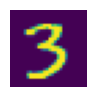

In [12]:
show_image(three_tensors[1])

In [13]:
#형변환
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [14]:
#속성의 길이 = 랭크
len(stacked_threes.shape)

3

In [15]:
#차원 = 길이가 3인 벡터? 랭크? 축의 크기? 축의 개수?
stacked_threes.ndim

3

<Axes: >

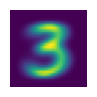

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

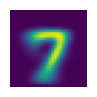

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [5]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
tns[1]

tensor([4, 5, 6])

In [8]:
tns[:,1]

tensor([2, 5])

In [12]:
tns[1,1:3]

tensor([5, 6])

In [10]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [13]:
tns.type()

'torch.LongTensor'

In [14]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o))])

In [10]:
#| export